-------------------
 Miriam Kavulamine


## 1- Informações do conjunto de dados

Este conjunto de dados foi coletados por meio de questionários diretos de pacientes do Sylhet Diabetes
Hospital em Sylhet, Bangladesh e aprovado por um médico.

Conjunto de dados de previsão de risco de diabetes em estágio inicial.. (2020). Repositório de aprendizado de máquina UCI. https://doi.org/10.24432/C5VG8H

## 2- Objectivos

* Construir um modelo da IA com dados fáceis de preencher por qualquer pessoa, sem necessidade de exames de sangue ou qualquer procedimento invasivo ou complexo e prever as pessoas são propensas a devevolver Diabetes.

## 3 Colunas do conjunto de Dados

* Age 	
* Sex 		
* Polyuria 		
* Polydipsia 		
* sudden weight loss 		
* weakness 		
* Polyphagia 	
* Genital thrush 	
* visual blurring 		
* Itching 		
* Irritability 	
* delayed healing 		
* partial paresis 		
* muscle stiness 		
* Alopecia 	
* Obesity 		
* Class 	

## 4- Importação das Bliotecas

In [37]:
import pandas as pd
import numpy as np
import os, sys
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from matplotlib.dates import DateFormatter, YearLocator, MonthLocator, DayLocator, HourLocator

import warnings


## 5- Ler o Conjunto de Dados

In [38]:
df = pd.read_csv('diabetes_data_upload.csv')

In [39]:
# Shape
df.shape

(520, 17)

In [40]:
#Exibir as 10 primeiras linhas do conjunto de dados
df.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [41]:
# Exibir a Informação dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [42]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [43]:
# Verificar se temos valores Unicos no Conjunto de dados
df.isna().sum()


Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [44]:
# Criar a Coluna ID
df['ID'] = range(1, len(df) + 1)

In [45]:
df['ID'].nunique()

520

In [46]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,ID
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,1
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,2
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,3
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,4
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,5


In [47]:
# Ver os Valores unicoss no nosso conjunto de dados
df.nunique()

Age                    51
Gender                  2
Polyuria                2
Polydipsia              2
sudden weight loss      2
weakness                2
Polyphagia              2
Genital thrush          2
visual blurring         2
Itching                 2
Irritability            2
delayed healing         2
partial paresis         2
muscle stiffness        2
Alopecia                2
Obesity                 2
class                   2
ID                    520
dtype: int64

## 5- Conclusão:

* Temos um conjonto de dados com as seguintes caracteristica:

* Contagem: Existem 520 observações (ou registos) no nosso dataset.


* Média (mean): A idade média é de aproximadamente 48,02 anos.


* Desvio Padrão (std): O desvio padrão é cerca de 12,15 anos. Isso indica o quanto os valores individuais se afastam da média. Um desvio padrão maior indica uma dispersão maior dos dados.


* Valor Mínimo (min): A idade mínima registrada no conjunto de dados é 16 anos.


* Primeiro Quartil (25% - Q1): 25% das idades estão abaixo de 39 anos.


* Mediana (50% - Q2): A mediana, que é o valor que divide o conjunto de dados ao meio, é de 47,5 anos. Isso significa que metade das idades estão abaixo de 47,5 anos e metade está acima.


* Terceiro Quartil (75% - Q3): 75% das idades estão abaixo de 57 anos.


* Valor Máximo (max): A idade máxima registrada no conjunto de dados é de 90 anos.


* Não temos Valores Ausentes no conjunto de dados, nem dados Duplicado.

* Criamos a coluna ID, para nos certificar que não temos dados duplicados no nosso conjunto de dados

## 6 -Analise exploratoria de Dados

In [48]:
#Contar quantas classes temos de positivos e negativos
df['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

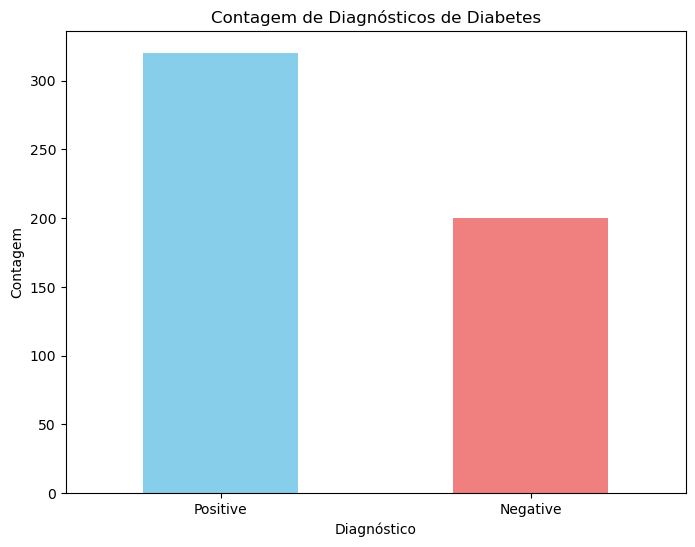

In [49]:
# Contagem de diagnósticos
diagnosis_counts = df['class'].value_counts()

# Criar um gráfico de barras
plt.figure(figsize=(8, 6))
diagnosis_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Contagem de Diagnósticos de Diabetes')
plt.xlabel('Diagnóstico')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.show()

No conjunto de dados, há 320 observações com o diagnóstico "Positive" (positivo para diabetes) e 200 observações com o diagnóstico "Negative" (negativo para diabetes). Essas contagens representam o número de casos positivos e negativos para diabetes no conjunto de dados.

In [50]:
df['Gender'].value_counts()

Male      328
Female    192
Name: Gender, dtype: int64

In [51]:
(df['Gender'].value_counts() / len(df)) * 100

Male      63.076923
Female    36.923077
Name: Gender, dtype: float64

No conjunto de dados, há 328 observações de pacientes do sexo masculino (Male) e 192 observações de pacientes do sexo feminino (Female). Onde 63% do sexo masculino e 37% do sexo Femenino

In [52]:
count_df = df.groupby(['Gender', 'class']).size().reset_index(name='Count')

In [53]:
count_df

,Gender,class,Count
0,Female,Negative,19
1,Female,Positive,173
2,Male,Negative,181
3,Male,Positive,147


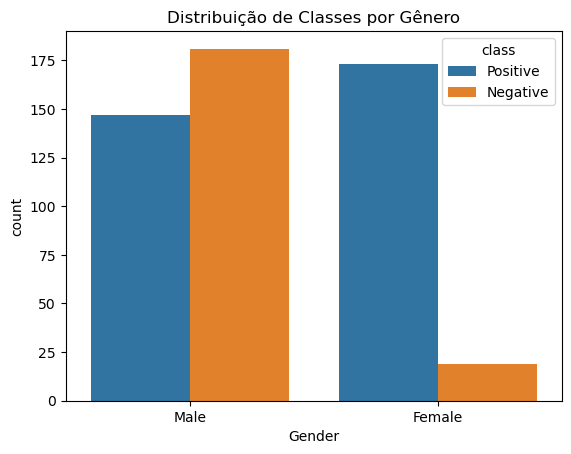

In [55]:
sns.countplot(data=df, x='Gender', hue='class')
plt.title('Distribuição de Classes por Gênero')
plt.show()

19 pacientes do sexo feminino com diagnóstico negativo (Negative).
173 pacientes do sexo feminino com diagnóstico positivo (Positive).
181 pacientes do sexo masculino com diagnóstico negativo (Negative).
147 pacientes do sexo masculino com diagnóstico positivo (Positive).

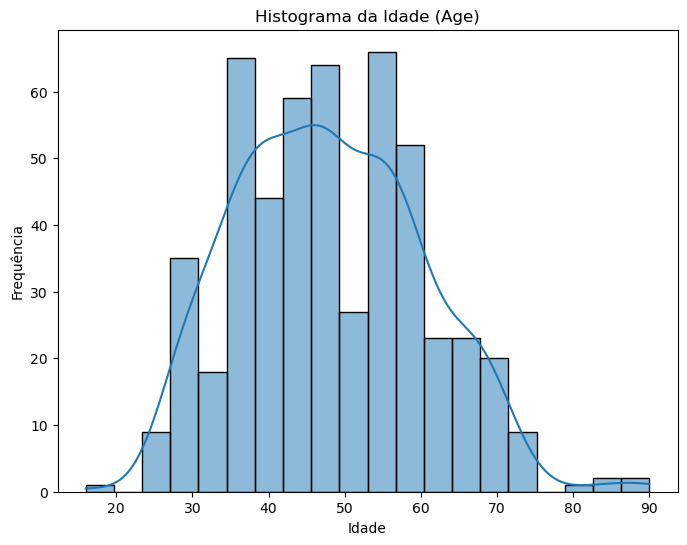

In [56]:
# Definindo o layout da figura
plt.figure(figsize=(8, 6))

# Plotando o histograma da variável 'Age'
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Histograma da Idade (Age)')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Exibindo o histograma
plt.show()

podemos observar que a maioria das pessoas no conjunto de dados parece estar na faixa dos 40 a 50 anos de idade. Também podemos ver que a distribuição parece seguir uma forma geralmente simétrica, com uma cauda mais longa à direita, o que sugere que há algumas pessoas mais velhas no conjunto de dados.

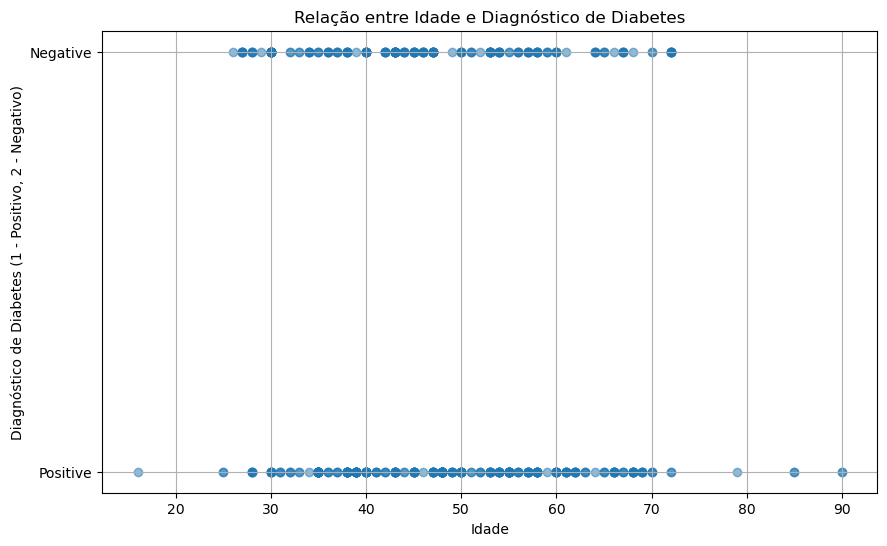

In [57]:
# Criar um gráfico de dispersão para idade versus diagnóstico de diabetes
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['class'], alpha=0.5)
plt.title('Relação entre Idade e Diagnóstico de Diabetes')
plt.xlabel('Idade')
plt.ylabel('Diagnóstico de Diabetes (1 - Positivo, 2 - Negativo)')
plt.grid(True)
plt.show()

* Existem pontos em ambas as categorias de diagnóstico (positivo e negativo) em várias faixas etárias, o que é esperado, pois pessoas de diferentes idades podem ser diagnosticadas com ou sem diabetes.

* Não parece haver uma tendência clara de que a idade esteja estritamente relacionada ao diagnóstico de diabetes. Não podemos dizer definitivamente que uma faixa etária específica tem mais ou menos chances de ser diagnosticada com diabetes com base apenas neste gráfico.

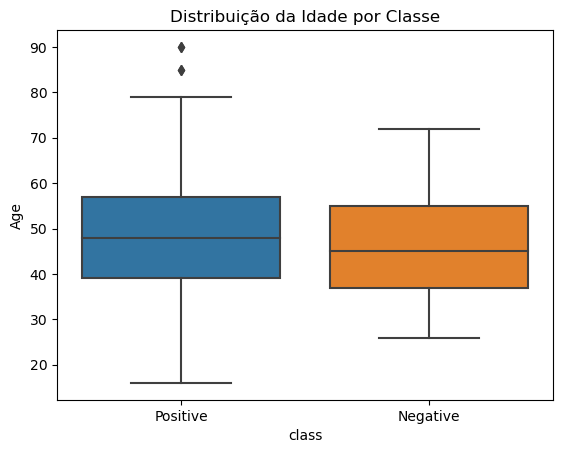

In [58]:
sns.boxplot(x='class', y='Age', data=df)
plt.title('Distribuição da Idade por Classe')
plt.show()

* Para a classe "Positive" (positivo), a mediana da idade parece estar em torno de 50 anos, com um intervalo interquartil (IQR) entre aproximadamente 40 e 60 anos. Existem alguns valores discrepantes (outliers) à direita da caixa, o que indica que há algumas pessoas mais velhas nessa classe.

* Para a classe "Negative" (negativo), a mediana da idade também parece estar em torno de 50 anos, com um IQR semelhante ao da classe "Positive". Assim como na classe "Positive", também existem alguns valores discrepantes à direita da caixa.

* Globalmente, as distribuições da idade nas duas classes são bastante semelhantes, com sobreposição significativa entre as caixas.